In [1]:
import numpy as np

# Dane treningowe: [masa, średnica]
X_train = np.array([
    [130.0, 7.0],   # jabłko
    [150.0, 8.0],   # jabłko
    [180.0, 8.5],   # jabłko
    [90.0, 6.0],    # pomarańcza
    [100.0, 6.5],   # pomarańcza
    [110.0, 7.0],   # pomarańcza
    [131.0, 7.3],   # jabłko
    [152.0, 8.1],   # jabłko
    [179.0, 8.3],   # jabłko
    [92.0, 6.1],    # pomarańcza
    [101.0, 6.5],   # pomarańcza
    [111.0, 7.0],   # pomarańcza
], dtype=float)

# Etykiety: jabłko = 1, pomarańcza = 0
y_train = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int)

# Dane testowe
X_test = np.array([
    [145.0, 9.5],   # jabłko
    [155.0, 8.5],   # jabłko
    [185.0, 8.2],   # jabłko
    [85.0, 7.0],    # pomarańcza
    [101.0, 6.1],   # pomarańcza
    [110.0, 8.0],   # pomarańcza
], dtype=float)

y_test = np.array([1, 1, 1, 0, 0, 0], dtype=int)

In [2]:
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    return np.where(x >= threshold, 1, 0)

In [28]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=100, activation=threshold_function):
        """
        lr: learning rate
        """

        self.lr = lr
        self.epochs = epochs
        self.activation = activation

        self.weights = None
        self.bias = 0

    

    def fit(self, features, labels):
        n_samples, n_features = features.shape

        self.weights = np.zeros(n_features)

        y = labels

        for _ in range(self.epochs):
            for i, x_i in enumerate(features):
                update = self._learn(i, x_i, y)

                self.weights += update * x_i
                self.bias += update
                
    def _learn(self, i, x_i, y):
        # linear_output = self._linear_output(x_i)
        # y_predicted = self.activation(linear_output)
        y_predicted = self.predict(x_i)
        update = self.lr * (y[i] - y_predicted)
        return update

    def _linear_output(self, x):
        return x @ self.weights + self.bias

    def predict(self, x):
        linear_output = self._linear_output(x)
        y_predicted = self.activation(linear_output)
        return y_predicted



In [29]:
p = Perceptron()
p.fit(X_train, y_train)


In [30]:
preds = p.predict(X_test)
preds


array([0, 1, 1, 0, 0, 0])

In [31]:
y_test

array([1, 1, 1, 0, 0, 0])

In [32]:
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_test.max()

X_train_scaled

array([[0.72222222, 0.03888889],
       [0.83333333, 0.04444444],
       [1.        , 0.04722222],
       [0.5       , 0.03333333],
       [0.55555556, 0.03611111],
       [0.61111111, 0.03888889],
       [0.72777778, 0.04055556],
       [0.84444444, 0.045     ],
       [0.99444444, 0.04611111],
       [0.51111111, 0.03388889],
       [0.56111111, 0.03611111],
       [0.61666667, 0.03888889]])

In [33]:
p1 = Perceptron()
p1.fit(X_train_scaled, y_train)

p1.predict(X_test_scaled)

array([1, 1, 1, 0, 0, 0])

In [18]:
X_rounded = np.round(X_train_scaled, 1)
X_rounded

array([[0.7, 0. ],
       [0.8, 0. ],
       [1. , 0. ],
       [0.5, 0. ],
       [0.6, 0. ],
       [0.6, 0. ],
       [0.7, 0. ],
       [0.8, 0. ],
       [1. , 0. ],
       [0.5, 0. ],
       [0.6, 0. ],
       [0.6, 0. ]])

In [19]:
p = Perceptron()
p.fit(X_rounded, y_train)

p.predict(X_test_scaled)

array([1, 1, 1, 0, 0, 0])

In [20]:
import matplotlib.pyplot as plt
import numpy as np

DOT_SIZE = 100
ALPHA = 0.5


def make_meshgrid(X, n_points=200, margin=2):
    """
    Tworzy dwuwymiarową siatkę punktów (meshgrid) obejmującą obszar danych X.

    Parametry:
    - X: macierz danych (n_samples, 2)
    - n_points: liczba punktów siatki w każdym kierunku
    - margin: zapas wokół min/max osi, aby siatka była szersza niż same punkty

    Zwraca:
    - xx, yy: dwie macierze współrzędnych o wymiarach (n_points, n_points)
    """
    # Ustalamy granice siatki na podstawie zakresu danych
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

    # Tworzymy regularną siatkę punktów
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, n_points),
        np.linspace(y_min, y_max, n_points)
    )
    return xx, yy


def predict_on_mesh(model, xx, yy):
    """
    Dokonuje predykcji modelu na wszystkich punktach siatki (xx, yy).

    Parametry:
    - model: obiekt z metodą predict()
    - xx, yy: siatki współrzędnych utworzone przez np.meshgrid

    Zwraca:
    - Z: macierz predykcji o tych samych wymiarach co xx i yy
    """
    # Spłaszczamy siatkę do punktów (N, 2)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predykcja modelu dla wszystkich punktów siatki
    Z = model.predict(grid_points)

    # Przywracamy wymiary siatki
    return Z.reshape(xx.shape)


def plot_decision_boundary(X, y, model,
                           xlabel="", ylabel="",
                           title=None, legend=True,
                           class_labels=("Klasa 0", "Klasa 1"),
                           alpha=0.3, dot_size=50):
    """
    Rysuje granicę decyzyjną modelu 2D oraz rzeczywiste i przewidziane etykiety.

    Parametry:
    - X: dane wejściowe (2 cechy)
    - y: rzeczywiste etykiety 0/1
    - model: obiekt z predict(), np. perceptron
    - xlabel, ylabel: opisy osi
    - title: opcjonalny tytuł wykresu
    - legend: czy wyświetlać legendę
    - class_labels: nazwy klas (dla legendy)
    - alpha: przezroczystość dla tła i punktów
    - dot_size: rozmiar kropek
    """
    # --- przygotowanie siatki dla konturu ---
    xx, yy = make_meshgrid(X)
    Z = predict_on_mesh(model, xx, yy)
    y_pred = model.predict(X)

    # --- tło (granica decyzyjna jako contour plot) ---
    plt.contourf(xx, yy, Z, alpha=alpha, cmap=plt.cm.RdYlBu)

    # --- predykcje modelu (kolor wypełnienia) ---
    plt.scatter(
        X[y_pred == 0, 0], X[y_pred == 0, 1],
        c="blue", marker="o", alpha=alpha, s=dot_size,
        label=f"{class_labels[0]} (pred)"
    )
    plt.scatter(
        X[y_pred == 1, 0], X[y_pred == 1, 1],
        c="red", marker="o", alpha=alpha, s=dot_size,
        label=f"{class_labels[1]} (pred)"
    )

    # --- rzeczywiste etykiety (kolor obramowania) ---
    plt.scatter(
        X[y == 0, 0], X[y == 0, 1],
        c="white", marker="+", label=f"{class_labels[0]} (true)"
    )
    plt.scatter(
        X[y == 1, 0], X[y == 1, 1],
        c="green", marker="+", label=f"{class_labels[1]} (true)"
    )

    # --- opisy i tytuł ---
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)

    # --- legenda po prawej stronie ---
    if legend:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()


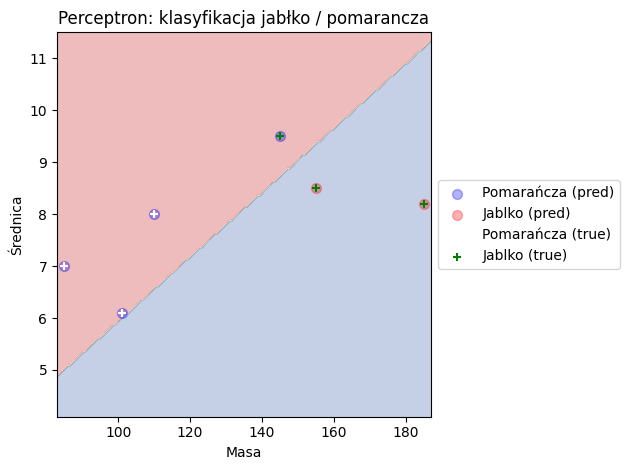

In [24]:
plot_decision_boundary(
    X_test, y_test, p,
    xlabel="Masa",
    ylabel="Średnica",
    title="Perceptron: klasyfikacja jabłko / pomarancza",
    legend=True,
    class_labels=("Pomarańcza", "Jablko")
)

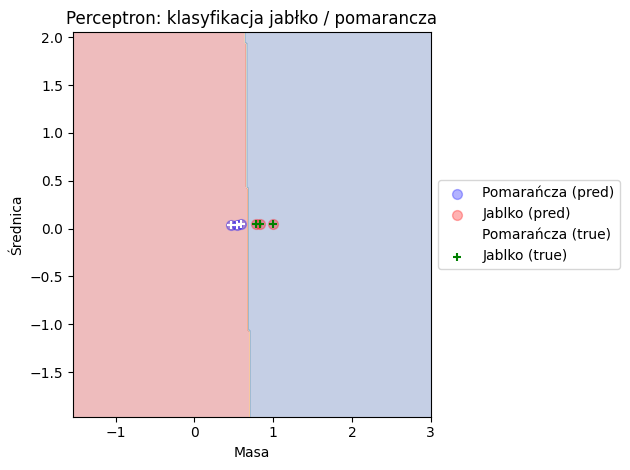

In [36]:
plot_decision_boundary(
    X_test_scaled, y_test, p1,
    xlabel="Masa",
    ylabel="Średnica",
    title="Perceptron: klasyfikacja jabłko / pomarancza",
    legend=True,
    class_labels=("Pomarańcza", "Jablko")
)

In [35]:
X_test

array([[145. ,   9.5],
       [155. ,   8.5],
       [185. ,   8.2],
       [ 85. ,   7. ],
       [101. ,   6.1],
       [110. ,   8. ]])